In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npa
import cv2

In [2]:
test_dir = '../../data/test/'
train_dir = '../../data/train/'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.7.0


In [4]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [5]:
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32,
    shuffle=True
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, InputLayer, Dropout, Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad
from tensorflow.keras.utils import plot_model

In [7]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(2, 2), strides=(1, 1), input_shape=(64, 64, 3), activation='relu', padding='same'),
    MaxPool2D(strides=(2, 2)),
    Dropout(rate=0.2),
    Conv2D(filters=80, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(strides=(2, 2)),
    Conv2D(filters=60, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(strides=(2, 2)),
    Conv2D(filters=50, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(strides=(2, 2)),
    Flatten(),
    Dense(units=512, activation='sigmoid'),
    Dropout(rate=0.2),
    Dense(units=1, activation='sigmoid')
])

Metal device set to: Apple M1


2022-02-23 13:26:01.729055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-23 13:26:01.729214: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


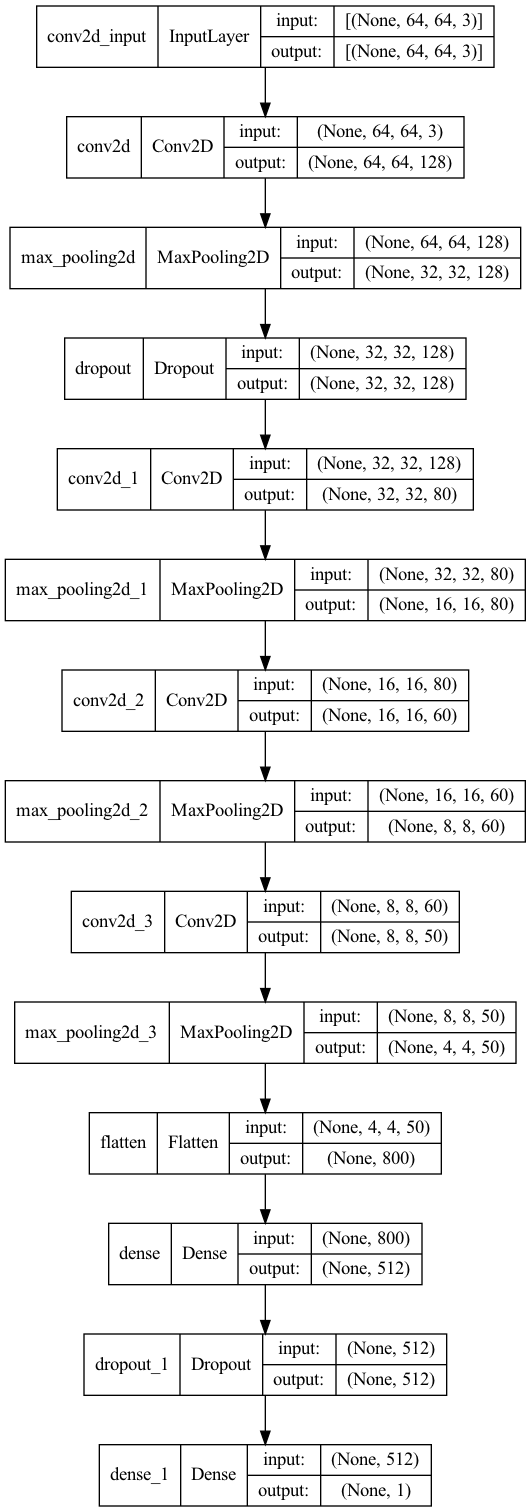

In [8]:
plot_model(model=model, show_shapes=True, show_layer_names=True)

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()]
)

In [10]:
history = model.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    verbose=1
)

2022-02-23 13:26:02.126093: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-02-23 13:26:02.386106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - ETA: 0s - loss: 0.6072 - accuracy: 0.6625 - auc: 0.7195 - precision: 0.6295

2022-02-23 13:26:07.886014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 7s 75ms/step - loss: 0.6072 - accuracy: 0.6625 - auc: 0.7195 - precision: 0.6295 - val_loss: 0.5190 - val_accuracy: 0.7606 - val_auc: 0.8092 - val_precision: 0.6614
Epoch 2/100
83/83 [==============================] - 6s 69ms/step - loss: 0.4749 - accuracy: 0.7694 - auc: 0.8358 - precision: 0.7087 - val_loss: 0.5557 - val_accuracy: 0.6894 - val_auc: 0.8770 - val_precision: 0.5941
Epoch 3/100
83/83 [==============================] - 6s 72ms/step - loss: 0.4216 - accuracy: 0.7892 - auc: 0.8797 - precision: 0.7372 - val_loss: 0.4509 - val_accuracy: 0.7697 - val_auc: 0.8915 - val_precision: 0.6652
Epoch 4/100
83/83 [==============================] - 6s 68ms/step - loss: 0.4036 - accuracy: 0.7926 - auc: 0.8881 - precision: 0.7379 - val_loss: 0.4222 - val_accuracy: 0.7818 - val_auc: 0.9044 - val_precision: 0.6773
Epoch 5/100
83/83 [==============================] - 5s 64ms/step - loss: 0.4175 - accuracy: 0.7937 - auc: 0.8792 - precision: 0.7368 - val_